In [2]:
from random import choices
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np
import statistics
import math
import random
from numba import jit, cuda 
from timeit import default_timer as timer   

In [6]:
plt.style.use(['dark_background'])
plt.rcParams['figure.figsize'] = (6.4,4.8)

In [16]:
c = 0.9
k = 10
B = 1/k
evals = 16000
genes = 1000
repeat = 20
Ps = np.tile(np.random.random(10),(repeat,1))
optimal_Ps = np.tile(np.around(np.linspace(0.1,1,10),2),(repeat,1))
parent = np.random.uniform(low = -10, high= 10, size=(len(Ps[0]),genes))
sigma = np.tile(0.1,(repeat,10))
parent = np.tile(parent,(repeat,1,1))

In [17]:
def change_sigma(p,sig,opt):
    if p < opt:
        sig *= c
    elif p > opt:
        sig /= c
    else:
        pass
    return sig

# ES(1+1)

In [18]:
start = timer() 
costs = []
for i in range(evals):
    child = parent + np.tile(sigma.T,(genes,1,1)).T * np.random.normal(0,1,size = (repeat,len(Ps[0]),genes))
    pa,ch = np.sum(np.square(parent),axis = 2),np.sum(np.square(child),axis = 2)
    s = ch < pa
    Ps = (1-B)*Ps + B*s
    sigma = sigma*c*(Ps<optimal_Ps) + sigma/c*(Ps>optimal_Ps) + sigma*1*(Ps == optimal_Ps)
    parent = child * np.tile(s.T,(genes,1,1)).T + parent * np.tile((1-s).T,(genes,1,1)).T
    costs.append(np.mean(ch,axis = 0))
costs = np.array(costs)
print("with GPU:", timer()-start) 

with GPU: 13.29722060000001


# Hill Climbing

In [317]:
evals = 16000
genes = 1000
repeat = 20
parent = np.tile(np.random.uniform(low = -10, high= 10, size = genes),(repeat,1))
sigma = 0.1

In [318]:
costs2 = []
for i in range(evals):
    child = parent + sigma * np.random.normal(0,1,size = (repeat,genes))
    pa,ch = np.sum(np.square(parent),axis = 1),np.sum(np.square(child),axis = 1)
    s = ch < pa
    parent = child * np.tile(s.T,(genes,1)).T + parent * np.tile((1-s).T,(genes,1)).T
    costs2.append(np.mean(ch,axis = 0))
costs2 = np.array(costs2)

In [ ]:
c = 0.9
k = 10
B = 1/k
evals = 16000
genes = 1000
repeat = 20

In [327]:
plt.rcParams['figure.figsize'] = (2*6.4,2*4.8)

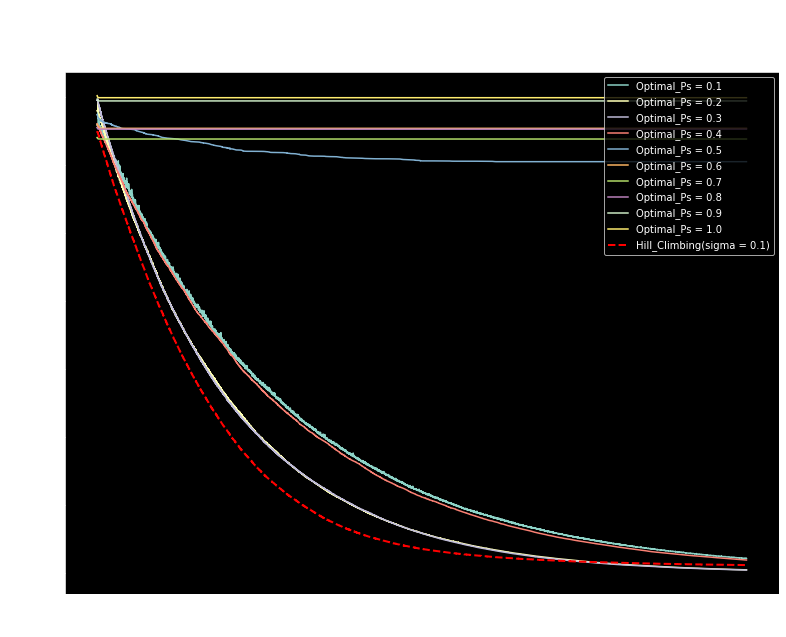

In [336]:
for i in range(len(costs[0])):
    plt.plot(np.arange(len(costs[:,i])),costs[:,i], label = 'Optimal_Ps = {}'.format(optimal_Ps[0,i]))
plt.plot(np.arange(len(costs2)),costs2,linestyle='--',color = 'red',label = 'Hill_Climbing(sigma = {})'.format(sigma),linewidth=2)
plt.title('ES(1+1) vs Hill-Climbing\nc = {}, k = {}, Evals = {}\nGenes = {}, repeat = {}, sigma = {}'.format(c,k,evals,genes,repeat,sigma),size = 20)
plt.xlabel('Evaluations',size = 15)
plt.ylabel('Cost',size = 15)
plt.legend(loc="upper right")

In [337]:
sigmas = [0.01,0.1,0.4,0.7,1]

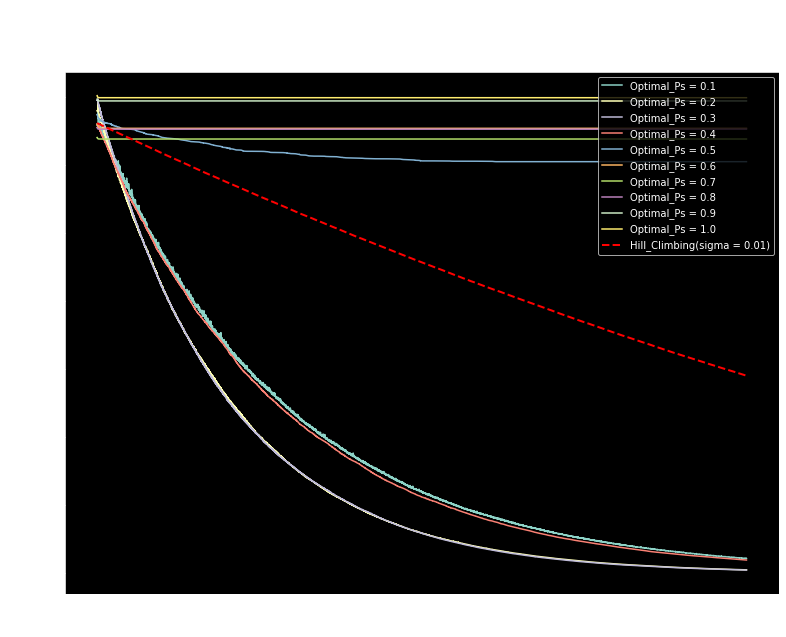

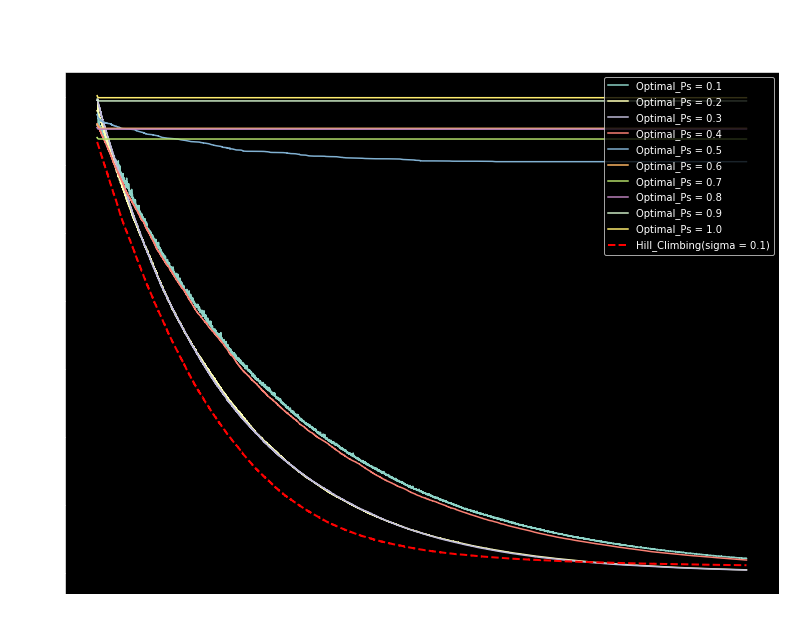

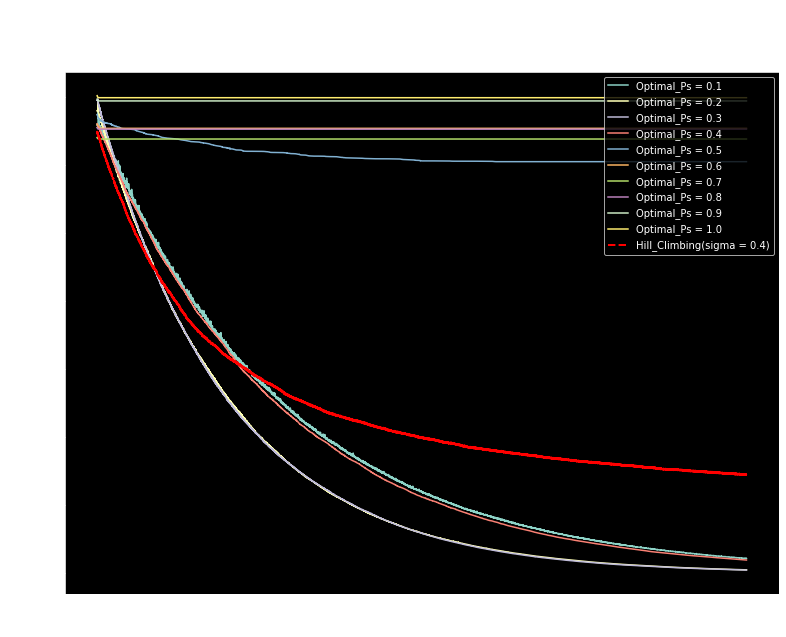

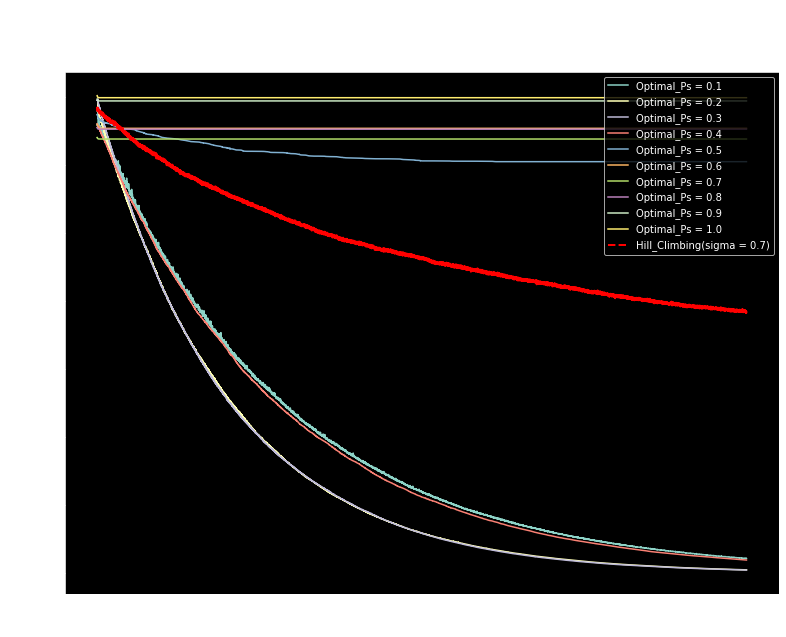

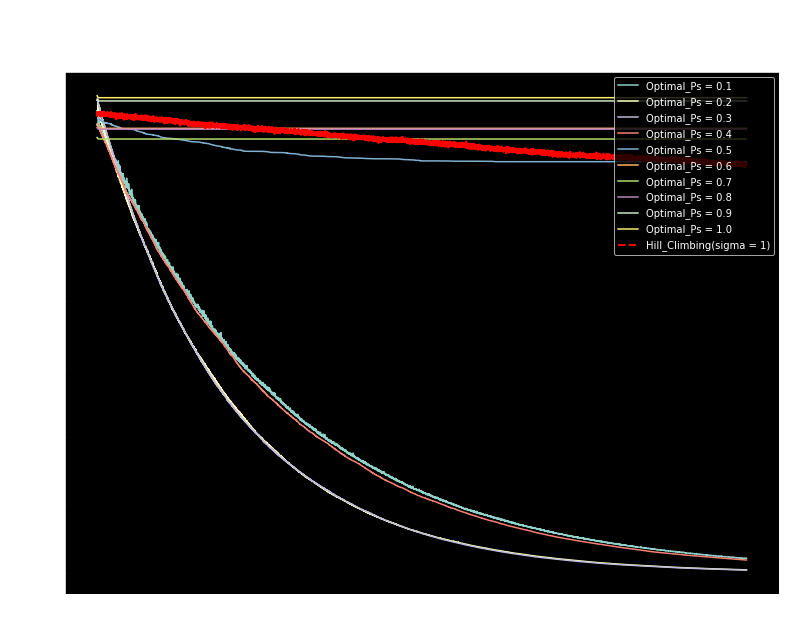

In [339]:
for sig in sigmas:
    costs2 = []
    evals = 16000
    genes = 1000
    repeat = 20
    parent = np.tile(np.random.uniform(low = -10, high= 10, size = genes),(repeat,1))
    for i in range(evals):
        child = parent + sig * np.random.normal(0,1,size = (repeat,genes))
        pa,ch = np.sum(np.square(parent),axis = 1),np.sum(np.square(child),axis = 1)
        s = ch < pa
        parent = child * np.tile(s.T,(genes,1)).T + parent * np.tile((1-s).T,(genes,1)).T
        costs2.append(np.mean(ch,axis = 0))
    costs2 = np.array(costs2)
    for i in range(len(costs[0])):
        plt.plot(np.arange(len(costs[:,i])),costs[:,i], label = 'Optimal_Ps = {}'.format(optimal_Ps[0,i]))
    plt.plot(np.arange(len(costs2)),costs2,linestyle='--',color = 'red',label = 'Hill_Climbing(sigma = {})'.format(sig),linewidth=2)
    plt.title('ES(1+1) vs Hill-Climbing\nc = {}, k = {}, Evals = {}\nGenes = {}, repeat = {}, sigma = {}'.format(c,k,evals,genes,repeat,sig),size = 20)
    plt.xlabel('Evaluations',size = 15)
    plt.ylabel('Cost',size = 15)
    plt.legend(loc="upper right")
    plt.show()
    